In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np


df = pd.read_csv('imdb_master.csv', encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values


#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:]) # defining input_dim

# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300, input_dim= input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) #change no. of neurons to three and activation function as softmax 
                                                 #for output layer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  
Epoch 1/5
293/293 [==============================] - 4s 13ms/step - loss: 0.8825 - acc: 0.5053 - val_loss: 0.8423 - val_acc: 0.5151
Epoch 2/5
293/293 [==============================] - 4s 12ms/step - loss: 0.7920 - acc: 0.5777 - val_loss: 0.8389 - val_acc: 0.5166
Epoch 3/5
293/293 [==============================] - 3s 12ms/step - loss: 0.6938 - acc: 0.6729 - val_loss: 0.8646 - val_acc: 0.5164
Epoch 4/5
293/293 [==

In [2]:

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

782/782 [==============================] - 1s 2ms/step - loss: 1.0468 - acc: 0.5108
Evaluation result on Test Data : Loss = 1.0467809438705444, accuracy = 0.5107600092887878


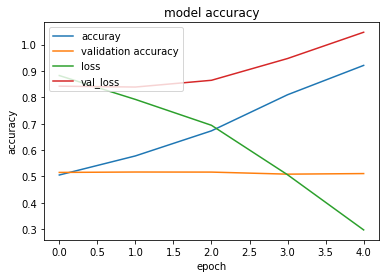

In [3]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [4]:
# Adding Embedding layer to the model 
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

sentences1 = df['review']

max_review_len= max([len(s.split()) for s in sentences1])
vocab_size= len(tokenizer.word_index)+1
sentences1 = tokenizer.texts_to_sequences(sentences1)
padded_docs= pad_sequences(sentences1,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model1 = Sequential()
model1.add(Embedding(vocab_size, 50, input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 144s 492ms/step - loss: 1.0588 - acc: 0.4882 - val_loss: 0.8727 - val_acc: 0.5023
Epoch 2/5
293/293 [==============================] - 156s 533ms/step - loss: 0.8436 - acc: 0.5176 - val_loss: 0.8420 - val_acc: 0.5000
Epoch 3/5
293/293 [==============================] - 155s 530ms/step - loss: 0.7996 - acc: 0.5539 - val_loss: 0.8394 - val_acc: 0.5061
Epoch 4/5
293/293 [==============================] - 162s 553ms/step - loss: 0.7367 - acc: 0.6192 - val_loss: 0.8761 - val_acc: 0.5018
Epoch 5/5
293/293 [==============================] - 156s 532ms/step - loss: 0.6342 - acc: 0.6978 - val_loss: 0.9446 - val_acc: 0.4919


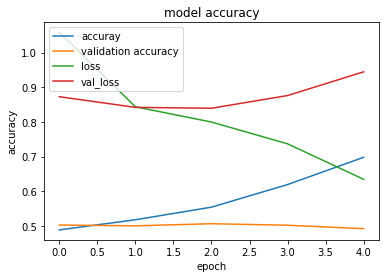

In [5]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [6]:
# Applying the same for 20news data 
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences2 = newsgroups_train.data
y = newsgroups_train.target

max_review_len= max([len(s.split()) for s in sentences2])
vocab_size= len(tokenizer.word_index)+1
sentences2 = tokenizer.texts_to_sequences(sentences2)
padded_docs= pad_sequences(sentences2,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(20, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history2=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
34/34 [==============================] - 73s 2s/step - loss: 13.4064 - acc: 0.0517 - val_loss: 3.0367 - val_acc: 0.0650
Epoch 2/5
34/34 [==============================] - 90s 3s/step - loss: 3.0106 - acc: 0.0559 - val_loss: 3.0076 - val_acc: 0.0527
Epoch 3/5
34/34 [==============================] - 95s 3s/step - loss: 2.9780 - acc: 0.0540 - val_loss: 3.0002 - val_acc: 0.0364
Epoch 4/5
34/34 [==============================] - 83s 2s/step - loss: 2.9611 - acc: 0.0598 - val_loss: 2.9760 - val_acc: 0.0703
Epoch 5/5
34/34 [==============================] - 82s 2s/step - loss: 2.9369 - acc: 0.0687 - val_loss: 2.9646 - val_acc: 0.0742


In [7]:
# predicting over the 4th sample data
print("Actual Value:",y_test[4],"Predicted Value",model2.predict_classes(X_test[[4],:]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Actual Value: 4 Predicted Value [7]
